In [26]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

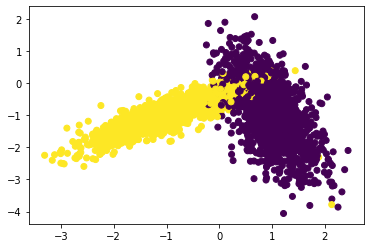

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [28]:
from sklearn.metrics import accuracy_score


In [29]:
#randomsearchCV TO perform the hyper parameter tunning
def RandomsearchCV (x_train,y_train,classifier,folds):
    group=[]
    grp=[]
    trainscores=[]
    testscores=[]
    params_range=(1,50)
    params_list=[ i for i in range(params_range[0] , params_range[1])]
    params_list=random.sample(params_list,10)
    params_list.sort()
    print(params_list)
    for k in tqdm(params_list):
        trainscores_folds=[]
        testscores_folds=[]
        for j in range(0,folds):
            #dividing the data set into groups
            group=(len(x_train)/(folds)) 
            grp=int(group)
            test_indices=list(set(list(range((grp*j),(grp*(j+1)))))) #data for the test
            train_indices=list(set(list(range(0,len(x_train))))-set(test_indices)) #data for the training of the model
            X_train=x_train[train_indices]
            Y_train=y_train[train_indices]
            X_test=x_train[test_indices]
            Y_test=y_train[test_indices]
        #imolementing the classifier knn
            classifier.n_neighbours=k
            classifier.fit(X_train,Y_train)
        
            Y_predicted=classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test,Y_predicted))
        
            Y_predicted= classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train,Y_predicted))
    
        trainscores.append(np.mean(np.array(trainscores_folds)))
    
        testscores.append(np.mean(np.array(testscores_folds)))
    
    return trainscores,testscores


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [31]:
neigh = KNeighborsClassifier()

params_range=sorted(list(set(Rand(1,50,10))))
print("Random Values = ", params_range)
folds = 3

train_scores,test_scores,params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)
print("\n********** TRAIN ACCURACY SCORES **********\n")
print(train_scores)
print("\n********** TEST ACCURACY SCORES **********\n")
print(test_scores)

Random Values =  [2, 18, 22, 26, 34, 35, 36, 37, 43, 45]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.05it/s]



********** TRAIN ACCURACY SCORES **********

[0.9677333333333333, 0.9575999999999999, 0.9570666666666666, 0.9573999999999999, 0.9579333333333334, 0.9576666666666666, 0.9580666666666667, 0.9579333333333334, 0.9580666666666667, 0.9578000000000001]

********** TEST ACCURACY SCORES **********

[0.9409333333333333, 0.9546666666666667, 0.9538666666666668, 0.9546666666666667, 0.9561333333333333, 0.9553333333333334, 0.9556, 0.9556, 0.9564, 0.9565333333333333]


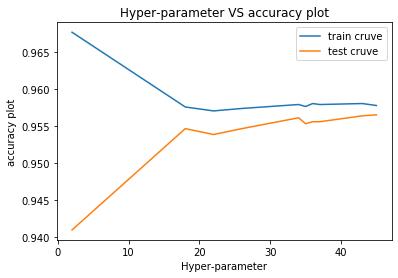

In [32]:
    

    
plt.plot(params['n_neighbors'],train_scores, label='train cruve')
plt.plot(params['n_neighbors'],test_scores, label='test cruve')
plt.xlabel('Hyper-parameter')
plt.ylabel('accuracy plot')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [34]:
#plot


In [15]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    #plot the training points also
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.legend()
    plt.xlabel('X Decision Boundaries Values')
    plt.ylabel('Y Decision Boundaries Values')
    plt.show()
    

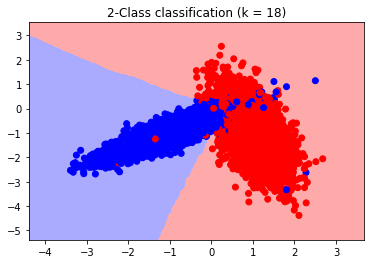

In [33]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors =18)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)